In [1]:
# Read a image

from PIL import Image
import numpy as np

path = "../ds/foot.png"


In [18]:
img = Image.open(path)
img = img.resize(np.array((img.size)) * 5)
img = img.convert("L")

In [83]:
img_n = np.array(img, dtype=np.uint8)

def convole2d(img, kernel):
    
    new_img = np.zeros_like(img, dtype=np.uint8)
    imh, imw = img.shape
    kh, kw = kernel.shape
    for i in range(kw // 2 + 1):
        for j in range(kh):
            nj = kh - 1 - j
            ni = kw - 1 - i
            
            kernel[j][i], kernel[nj][ni] = kernel[nj][ni], kernel[j][i]

    w_avg = 0
    offi, offj = 0, 0
    
    while offj < imh - kh:
        w_avg = 0
        for j in range(kw):
            for i in range(kh):
                w_avg += kernel[j][i] * img[offj + j][offi + i] 
        offi += 1
        if offi + kw >= imw:
            offi = 0
            offj += 1
        new_img[offj][offi] = w_avg
    return new_img

cimg = convole2d(img_n, np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=np.uint8))

/tmp/ipykernel_167806/1154434862.py:30: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  cimg = convole2d(img_n, np.array([
/tmp/ipykernel_167806/1154434862.py:22: RuntimeWarning: overflow encountered in scalar multiply
  w_avg += kernel[j][i] * img[offj + j][offi + i]


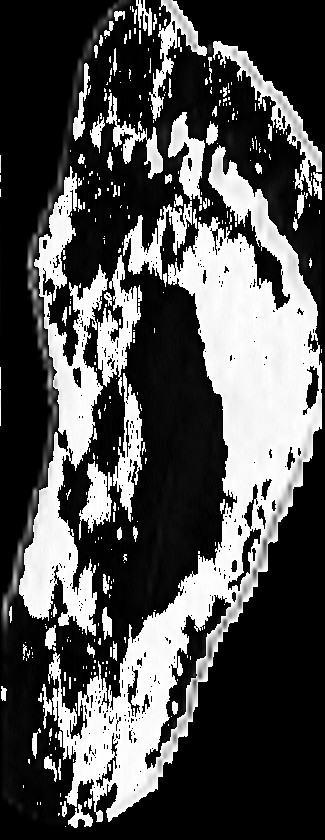

In [84]:
Image.fromarray(cimg)

/tmp/ipykernel_167806/2222904404.py:2: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  Image.fromarray(c2d(img_n, np.array([


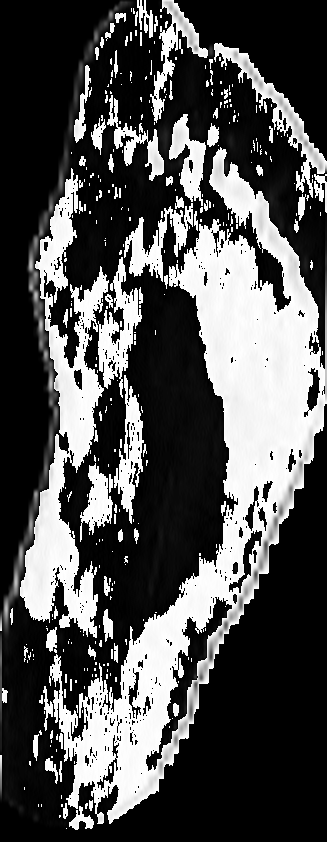

In [85]:
from scipy.signal import convolve2d as c2d
Image.fromarray(c2d(img_n, np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=np.uint8)))

In [108]:

def pool2d(img, m, n, pool_func):
    
    new_img = np.zeros((img.shape[0] // m , img.shape[1] // n), dtype=np.uint8)
    imh, imw = img.shape
    kh, kw = m, n
    
    offi, offj = 0, 0
    
    while offj < imh - kh:
        arr = []
        for j in range(kw):
            for i in range(kh):
                arr += [ img[offj + j][offi + i] ] 
        offi += kh
        if offi + kw >= imw:
            offi = 0
            offj += kw
        new_img[offj // kh][offi // kw] = pool_func(arr)
    return new_img

In [109]:
x = pool2d(img_n, 3, 3, lambda x : np.mean(x))

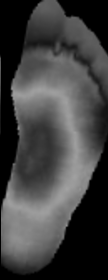

In [114]:
Image.fromarray(pool2d(img_n, 3, 3, lambda x : np.mean(x)))

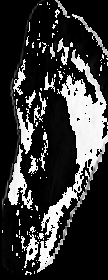

In [123]:
Image.fromarray(pool2d(convole2d(img_n, np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])), 3, 3, lambda x : np.min(x)))

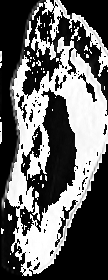

In [126]:
Image.fromarray(pool2d(convole2d(img_n, np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])), 3, 3, lambda x : np.max(x)))

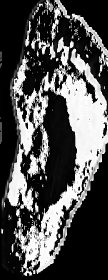

In [128]:
Image.fromarray(pool2d(convole2d(img_n, np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])), 3, 3, lambda x : np.mean(x)))

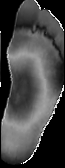

In [134]:
Image.fromarray(pool2d(convole2d(img_n, np.array([
    [1, 0, -1],
    [1, 1, -1],
    [1, 0, -1]
])), 5, 5, lambda x : np.median(x)))

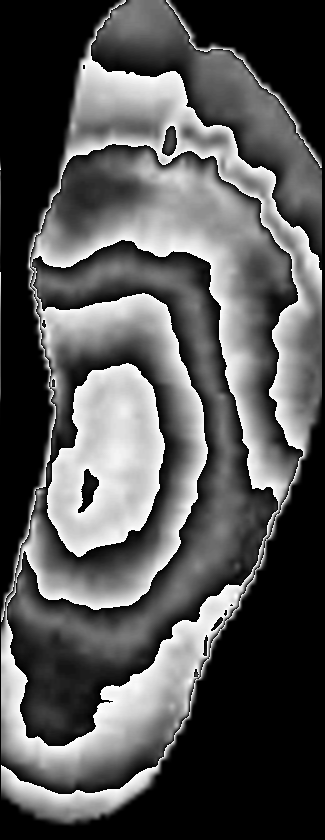

In [140]:
Image.fromarray((convole2d(img_n, np.array([
    [0, 0, 0],
    [1, 1, 1],
    [0, 1, 0]
]))))